# ELIZA-inspired Toy Example with "Heimaten" Data
---

 - an implementation of ELIZA: https://github.com/wadetb/eliza/tree/master  
   -> ELIZA has a (long) list of pre-defined answers that are activated (randomly) through simple pattern matching
 - funny thing about pattern-matching algorithms: they work much better in (more) isolating languages like English than more fusional ones like German


## IDEAS

 - do comments have the same prefixes because they answered to the same templatic question?  
   -> try to delete (would also idetify itself in tf-idf matrix)

 - n-grams?
 - create tf-idf matrix -> to capture important content words, as proxy for embeddings
 - Named-Entity recogniser? -> people mention specific places
 - feeling-based ("Heimat" as how it feels) vs deictic ("Heimat" as (a description of) a place)  
    -> A LOT of people use words "feel", "smell", etc

 - polarity items?
 - build basic KG -> to visualise (sampled) subsets
   - `similar` & `dissimilar` -> block each other (n^2 complexity)
   - `mentions same word`
   - `uttered after` -> relationship that builds temporal chain of comments
   - 

### VISUALISATION

 - need an ELIZA/EV-style environment:
   (1) system proposes one, two, three comments
   (2) user is prompted for input
   (3) system reacts
 - as static website: deploy data stats, visualisations and (pre-computed) random streams on GitHub pages  
   -> Javascript can animate
   -> maybe adapt a ELIZA implementation in JS? e.g. this one: https://github.com/keithweaver/eliza

## DATA

 - 152696 words in all 11196 comments
 - comments have a language annotated
 - what are:
   - `views` -> `views == 1` means it never got approved (and so never re-shown)
     => `views` is useless because it's full of statistical artifacts
   - `area_id` -> questions tied to a space, so people in certain `area_id` all answered the same question 
     ?
 - useless:
   - `placeholder` -> empty
   - `subchoice_id` -> only 12% there
   - `score` -> 46% have 0 (meaning approved), 46% have 1 (meaning 1 star), rest is less than 10%

In [3]:
import sqlite3
import pandas as pd
from pandas import read_sql_query, read_sql_table
import matplotlib.pyplot as plt 

In [ ]:
def read_sqlite(dbfile):

    with sqlite3.connect(dbfile) as dbcon:
        tables = list(read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", dbcon)['name'])
        out = {tbl : read_sql_query(f"SELECT * from {tbl}", dbcon) for tbl in tables}

    return out
tables = read_sqlite("museum.db")
answers = tables["answers"]
answers.to_csv("answers.csv", index=False)

In [4]:
answers = pd.read_csv("answers.csv")

In [5]:
from collections import Counter
vocab = Counter(w for ls in answers.text.str.split() for w in ls)

,id,text,score,views,language_question,language_guessed_answer,placeholder,area_id,choice_id,subchoice_id,user_name,user_place,time_created,time_updated
10975,10976,"Meine Heimat fühlt sich an wie...\nVertraut, s...",0,1,de,de,NaN,3,3,NaN,Jessica,Hamburg,2022-01-08 16:35:17,2022-01-08 16:35:41
2965,2966,Mein Heimatort ist die Stadt in der ich gebore...,10,415,de,de,NaN,1,1,NaN,.,.,2021-08-24 09:00:49,2022-01-12 01:14:05
5747,5748,Mein Heimatort ist Hamburg,0,1,de,de,NaN,1,1,NaN,Schmu,Hamburg,2021-10-05 14:40:07,2021-10-05 14:40:08
7827,7828,Man kann eine neue Heimat aufbauen mit einem s...,10,460,de,de,NaN,7,0,NaN,Ich,Hier,2021-11-06 14:57:10,2022-01-12 12:57:00
7241,7242,Mein Heimatort ist ...,0,1,de,de,NaN,1,1,NaN,NaN,Ingelheim,2021-10-31 10:04:12,2021-10-31 10:04:30
7861,7862,"Die Landschaft, die in mir Heimatgefühle weckt...",10,122,de,de,NaN,1,0,NaN,NaN,NaN,2021-11-07 12:37:04,2022-01-12 07:33:59
3786,3787,Meine Heimat klingt wie die Motoren und Wasser...,10,526,de,de,NaN,3,2,NaN,Berit,Hamburg,2021-09-01 10:13:49,2022-01-12 05:17:02
8675,8676,Die Nationalhymne erzeugt in mir ein Gefühl de...,-10,1,de,de,NaN,4,3,1.0,NaN,NaN,2021-11-27 15:05:35,2021-11-29 15:26:59
4530,4531,"Das Symbol, das in mir Heimatgefühle weckt, is...",0,1,de,de,NaN,4,8,0.0,Eva,Bayern/ Baden-Württemberg,2021-09-15 12:06:41,2021-09-15 12:06:43
2317,2318,Meine Heimat fühlt sich an wie ein Gefühl wo m...,10,672,de,de,NaN,3,3,NaN,Lennart,Hamburg,2021-08-18 08:44:29,2022-01-12 12:24:23


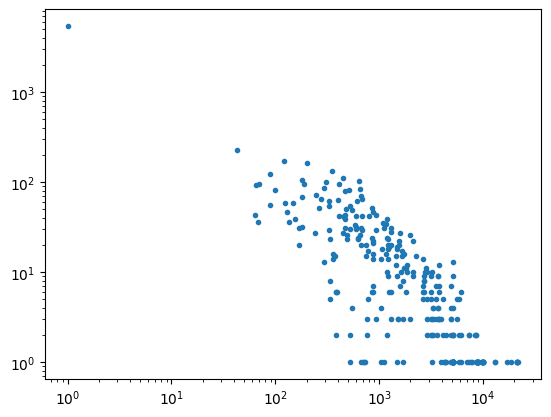

In [73]:
views_counts = answers.views.value_counts().sort_index()

_ = plt.loglog(list(views_counts.index),
         list(views_counts.values), ".")

# (answers.subchoice_id.value_counts()/len(answers)).sum()

# (answers.score.value_counts().sort_index()/len(answers))

answers.area_id.value_counts()

answers.user_name.isna().sum()/len(answers)#.choice_id.value_counts()

answers.user_name.str.strip().value_counts().iloc[:40]

# (answers.user_place.str.strip().value_counts()/len(answers))

answers.sample(10)

In [ ]:
answers.isna().sum(0)/len(answers)

answers.user_name[answers.user_name.apply(len) > 0].str.lower().value_counts()

In [ ]:
answers[answers.user_name.str.lower() == "anna"]

In [ ]:
answers[answers.language_guessed_answer == "en"].text.sample(1).iloc[0]

In [54]:
en = answers[answers.language_guessed_answer == "en"]
de = answers[answers.language_guessed_answer == "de"]

de.text.apply(lambda s: s[:30]).value_counts().iloc[:10].sum()/len(answers)

np.float64(0.4895498392282958)

In [53]:
de.text.apply(lambda s: s[:30]).value_counts().iloc[:16]

text
Der Mensch, der für mich Heima    993
Ich mache mir um meine Heimat     937
Die Landschaft, die in mir Hei    892
Meine Heimat fühlt sich an wie    792
So habe ich meine neue Heimat     549
Heimat finde ich in der Gemein    384
Die Menschen, die für mich Hei    357
Das Symbol, das in mir Heimatg    326
Die Nationalhymne erzeugt in m    137
Heimat ist für mich kein Mensc    114
Die Landschaft, in mir Heimatg    114
Die Bundesrepublik Deutschland    113
Das deutsche Grundgesetz weckt    110
Mein Heimatort ist Hamburg        105
Ich habe meine Heimat verloren    104
Die Bundesflagge erzeugt in mi     99
Name: count, dtype: int64